# Assignment 01

## Part I. Computational Complexity and Flop/s Performance
### I-1. Measuring Computational Complexity
Make a log-log plot of T vs. N using data from ``MDtime.out``

In [1]:
from matplotlib import pyplot as plt
import numpy as np
data_path = './MDtime.txt'
data = np.loadtxt(data_path)

In [2]:
N_data = data[:,0]
log10N = np.log10(N_data)
T_data = data[:,1]
log10T = np.log10(T_data)

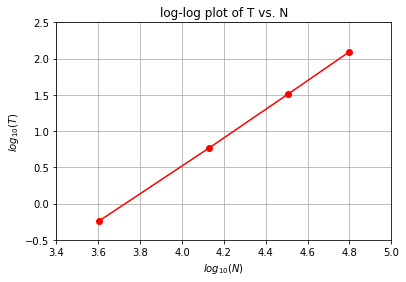

In [3]:
plt.plot(log10N, log10T,'ro-')
plt.xlabel('$log_{10}(N)$')
plt.ylabel('$log_{10}(T)$')
plt.title('log-log plot of T vs. N')
plt.xlim((3.4,5.0))
plt.ylim((-0.5,2.5))
plt.grid(True)
plt.savefig('./log10N_log10T_plot.png',dpi=200)

Perform linear fit of $log(T)$ vs. $log(N)$, i.e., $log(T) = \alpha log(N) + \beta$.

It is easy to know that $$\theta = (X^T X)^{-1} X^T \vec{y},$$ where $\vec{y} = [log(T_1), \cdots, log(T_k)]^T$, $\theta = [\alpha ,\, \beta ]^T$, and

$$
X = \begin{bmatrix}
    log(N_1)   & 1 \\
    log(N_2)   & 1 \\
    \vdots \\
    log(N_k) & 1
\end{bmatrix}$$

In [4]:
X = np.hstack((log10N.reshape(len(log10N), 1), np.ones(shape=(len(log10N),1))))
y = log10T.reshape(len(log10T), 1)

In [5]:
pinv = np.linalg.pinv(np.matmul(X.T, X))
theta = np.matmul(np.matmul(pinv, X.T), y)
print('alpha = %.4f, beta = %.4f' % (theta[0], theta[1]))
print('That is\n logT = %.4f * logN %.4f' % (theta[0], theta[1]))

alpha = 1.9506, beta = -7.2767
That is
 logT = 1.9506 * logN -7.2767
